In [1]:
%matplotlib inline


# Comparing different clustering algorithms on toy datasets


This example shows characteristics of different
clustering algorithms on datasets that are "interesting"
but still in 2D. With the exception of the last dataset,
the parameters of each of these dataset-algorithm pairs
has been tuned to produce good clustering results. Some
algorithms are more sensitive to parameter values than
others.

The last dataset is an example of a 'null' situation for
clustering: the data is homogeneous, and there is no good
clustering. For this example, the null dataset uses the
same parameters as the dataset in the row above it, which
represents a mismatch in the parameter values and the
data structure.

While these examples give some intuition about the
algorithms, this intuition might not apply to very high
dimensional data.



In [2]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

colors = np.array(list(islice(cycle(['#4daf4a', '#984ea3', '#f781bf', '#ff7f00', 
                                              '#a65628', 
                                             '#999999', '#e41a1c', '#dede00', '#377eb8']),
                                      int(5))))

colors = np.array( ['#4daf4a', '#984ea3', '#f781bf', '#ff7f00', 
          '#a65628', '#999999', '#e41a1c', '#dede00', '#377eb8'] )
xcolors = []
for clr in colors: 
    r = hex( int(clr[1:3], base=16)//2)[2:]
    g = hex( int(clr[3:5], base=16)//2)[2:]
    b = hex( int(clr[5:7], base=16)//2)[2:]
    if(len(r)==1): r = "0"+ r
    if(len(g)==1): g = "0"+ g
    if(len(b)==1): b = "0"+ b
    print( r, g, b )
    xcolors.append( '#' + r + g + b)
xcolors = np.array( xcolors)
xcolors

26 57 25
4c 27 51
7b 40 5f
7f 3f 00
53 2b 14
4c 4c 4c
72 0d 0e
6f 6f 00
1b 3f 5c


array(['#265725', '#4c2751', '#7b405f', '#7f3f00', '#532b14', '#4c4c4c',
       '#720d0e', '#6f6f00', '#1b3f5c'], 
      dtype='<U7')

(-5, 5)

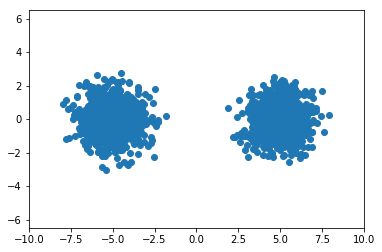

In [3]:
b1,b2 = datasets.make_blobs(1500, centers = [[-5,0],[5,0]])
plt.scatter(b1[:,0],b1[:,1]) #, color = colors[b2] )
plt.axis('equal')
plt.xlim(-10,10)
plt.ylim(-5,5)

array([[ 0,  4],
       [ 0, -4]])

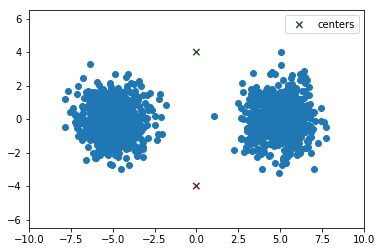

In [4]:
b1,b2 = datasets.make_blobs(1500, centers = [[-5,0],[5,0]])
plt.scatter(b1[:,0],b1[:,1])#, color = colors[b2] )
centers = np.array([ [0,4], [0,-4] ])  #'#4daf4a', '#984ea3'['#275827', '#5d2752']
plt.scatter(*centers.T, color = ['#275827', '#5d2752'], marker='x', s = 40, zorder = 10, label = "centers")
plt.axis('equal')
plt.xlim(-10,10)
plt.ylim(-5,5)
plt.legend()
centers

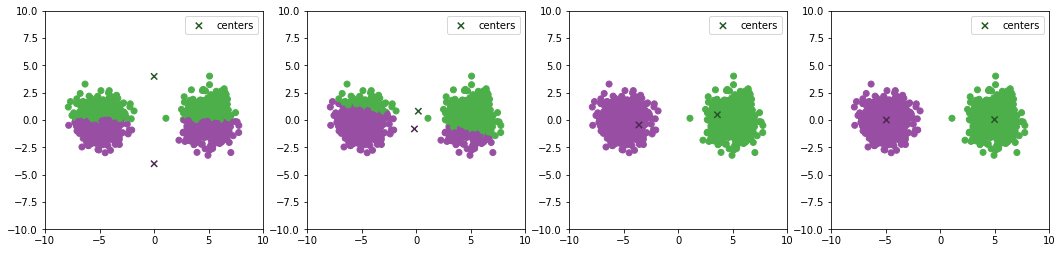

In [5]:
fig, axes = plt.subplots(1,4, figsize = [18,4])

def iterKmeans(ax):
    global centers
    y_labels = []

    for i in range(len(b1)):
         y_labels.append( np.argmin( [np.linalg.norm(b1[i] - center) for center in centers ]) )
    ax.scatter(b1[:,0],b1[:,1], color = colors[y_labels] )
    ax.scatter(*centers.T, color = xcolors, marker='x', s = 40, zorder = 10, label = "centers")
    ax.axis('equal')
    ax.set_xlim(-10,10)
    ax.set_ylim(-5,5)
    ax.legend()

    centers = np.zeros((2,2))
    cnts = [0]*len(centers)
    for i in range( len(y_labels) ):
        for k in range(max(y_labels)+1):
            if( y_labels[i] ==  k):
                centers[k] += b1[i]
                cnts[k] += 1
    for k in range(max(y_labels)+1):
        centers[k] /= cnts[k]
    return centers, cnts
for ax in axes:
    iterKmeans(ax)

array([[ 4.95975316, -4.96413383],
       [ 0.0102856 ,  5.04993933],
       [-5.03971289, -5.06484733]])

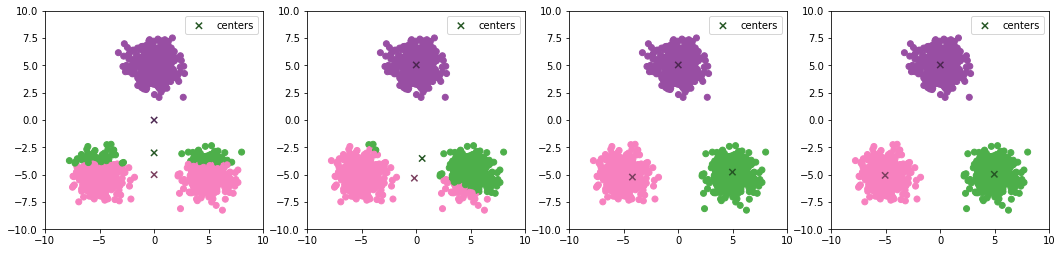

In [6]:
b1,b2 = datasets.make_blobs(1500, centers = [[-5,-5],[5,-5], [0,5]])
centers = np.array([ [0,-3], [0,0], [0,-5] ])  #'#4daf4a', '#984ea3'

"""plt.scatter(b1[:,0],b1[:,1])#, color = colors[b2] )
plt.scatter(*centers.T, color = ['#275827', '#5d2752'], marker='x', s = 40, zorder = 10, label = "centers")
plt.axis('equal')
plt.xlim(-10,10)
plt.ylim(-5,5)
plt.legend()
centers"""

fig, axes = plt.subplots(1,4, figsize = [18,4])

def iterKmeans(ax, colorBlobs = True):
    global centers

    y_labels = []

    for i in range(len(b1)):
         y_labels.append( np.argmin( [np.linalg.norm(b1[i] - center) for center in centers ]) )
    if(colorBlobs):
        ax.scatter(b1[:,0],b1[:,1], color = colors[y_labels] )
    else:
        ax.scatter(b1[:,0],b1[:,1] )
    ax.scatter(*centers.T, color = xcolors, marker='x', s = 40, zorder = 10, label = "centers")
    ax.axis('equal')
    ax.set_xlim(-10,10)
    ax.set_ylim(-5,5)
    ax.legend()
    
    centers = np.zeros(centers.shape)
    cnts = [0]*len(centers)
    for i in range( len(y_labels) ):
        for k in range(max(y_labels)+1):
            if( y_labels[i] ==  k):
                centers[k] += b1[i]
                cnts[k] += 1
    for k in range(max(y_labels)+1):
        centers[k] /= cnts[k]
    return centers

colorBlobs = True
for ax in axes:
    iterKmeans(ax, colorBlobs)
    colorBlobs = True
centers

array([[-5.05648882, -5.03046803],
       [ 0.04292925,  5.0314481 ],
       [ 5.0392939 , -5.00800427]])

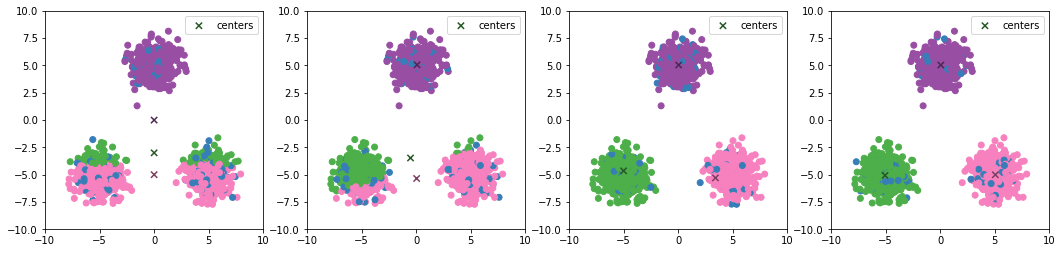

In [7]:
from numpy.random import rand 

b1,b2 = datasets.make_blobs(1500, centers = [[-5,-5],[5,-5], [0,5]])
centers = np.array([ [0,-3], [0,0], [0,-5] ])  #'#4daf4a', '#984ea3'

"""plt.scatter(b1[:,0],b1[:,1])#, color = colors[b2] )
plt.scatter(*centers.T, color = ['#275827', '#5d2752'], marker='x', s = 40, zorder = 10, label = "centers")
plt.axis('equal')
plt.xlim(-10,10)
plt.ylim(-5,5)
plt.legend()
centers"""

fig, axes = plt.subplots(1,4, figsize = [18,4])

def iterKmeans(ax, colorBlobs = True, BatchSize = 0.9 ):
    global centers

    y_labels = [-1]*len(b1)

    for i in range(len(b1)):
        if(rand() < BatchSize ):
            y_labels[i] = np.argmin( [np.linalg.norm(b1[i] - center) for center in centers ]) 
    if(colorBlobs):
        ax.scatter(b1[:,0],b1[:,1], color = colors[y_labels] )
    else:
        ax.scatter(b1[:,0],b1[:,1] )
    ax.scatter(*centers.T, color = xcolors, marker='x', s = 40, zorder = 10, label = "centers")
    ax.axis('equal')
    ax.set_xlim(-10,10)
    ax.set_ylim(-5,5)
    ax.legend()
    
    centers = np.zeros(centers.shape)
    cnts = [0]*len(centers)
    for i in range( len(y_labels) ):
        for k in range(max(y_labels)+1):
            if( y_labels[i] ==  k):
                centers[k] += b1[i]
                cnts[k] += 1
    for k in range(max(y_labels)+1):
        centers[k] /= cnts[k]
    return centers

colorBlobs = True
for ax in axes:
    iterKmeans(ax, colorBlobs)
    colorBlobs = True
centers

In [44]:
from numpy.random import rand
from numpy.linalg import norm

import networkx as nx

#b1,b2 = datasets.make_blobs(150, centers = [[-5,-5],[5,-5], [0,5]])
#b1 = np.append(b1, [ [0,0] ], axis = 0)

beta = 1
r = 1
S = lambda p,q: np.exp(-beta*norm(p - q)**4) 

nbrs = [0]*len(b1)
k = 5
edges = []

for i in range(len(b1)):
    if(nbrs[i] >= k): continue
    MS = [(-1,-1)]*k
    Mx = [0]*k
    for j in range(len(b1)):
        s = S(b1[i],b1[j])
        for l in range(k):
            if(s >= Mx[l] ):
                Mx[l] = s
                MS[l] = (i,j)
                break
    edges.extend(MS)
    for l in range(k):
        nbrs[ MS[l][1] ] += 1
    nbrs[i] += k
    
G = nx.Graph( )
G.add_edges_from(edges)

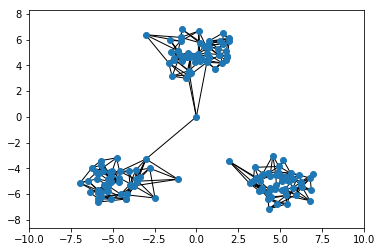

In [45]:
fig, ax = plt.subplots( )

ax.scatter(b1[:,0],b1[:,1], zorder = 5 )
#ax.axis('equal')
ax.set_xlim(-10,10)
#ax.set_ylim(-5,5)
positions = dict( [(i,b1[i]) for i in range(len(G))] )
nx.draw_networkx_edges(G,pos = positions, with_labels = False, ax = ax , zorder = 1)

(-10, 10)

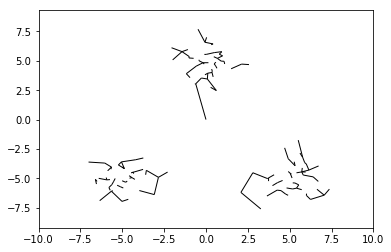

In [35]:
positions = dict( [(i,b1[i]) for i in range(len(G))] )
nx.draw_networkx_edges(G,pos = positions, with_labels = False )
plt.xlim(-10,10)

(array([[-5.03836058,  0.03000528],
        [ 5.0326418 , -0.02214653]]), [750, 750])

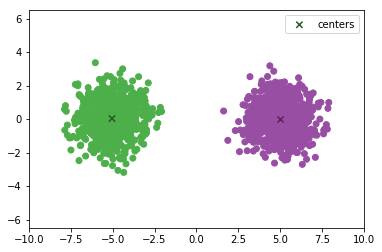

In [244]:
iterKmeans()

(array([[-5.008736  ,  0.05682612],
        [ 4.97374222, -0.01617558]]), [750, 750])

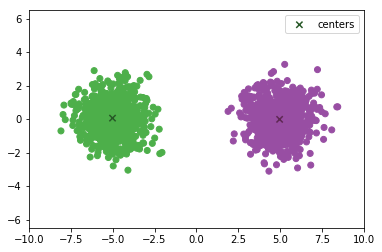

In [224]:
iterKmeans()

(array([[ 3.26665136,  0.55771186],
        [-3.41214737, -0.46565041]]), [764, 736])

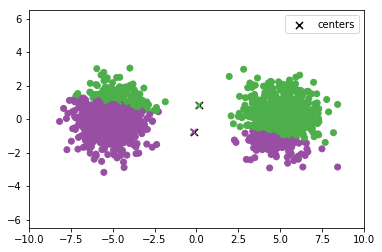

In [171]:
y_labels = []

for i in range(len(b1)):
     y_labels.append( np.argmin( [np.linalg.norm(b1[i] - center) for center in centers ]) )
plt.scatter(b1[:,0],b1[:,1], color = colors[y_labels] )
plt.scatter(*centers.T, color = colors, marker='x', s = 40, zorder = 10)
plt.scatter(*centers.T, color = 'black', marker='x', zorder = 5, s = 50, label = "centers")
plt.axis('equal')
plt.xlim(-10,10)
plt.ylim(-5,5)
plt.legend()

centers = np.zeros((2,2))
cnts = [0]*len(centers)
for i in range( len(y_labels) ):
    for k in range(max(y_labels)+1):
        if( y_labels[i] ==  k):
            centers[k] += b1[i]
            cnts[k] += 1
for k in range(max(y_labels)+1):
    centers[k] /= cnts[k]
centers, cnts

(array([[ 5.00361529,  0.04774744],
        [-5.02444038,  0.06341678]]), [750, 750])

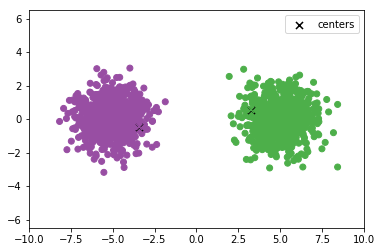

In [172]:
y_labels = []

for i in range(len(b1)):
     y_labels.append( np.argmin( [np.linalg.norm(b1[i] - center) for center in centers ]) )
plt.scatter(b1[:,0],b1[:,1], color = colors[y_labels] )
plt.scatter(*centers.T, color = colors, marker='x', s = 40, zorder = 10)
plt.scatter(*centers.T, color = 'black', marker='x', zorder = 5, s = 50, label = "centers")
plt.axis('equal')
plt.xlim(-10,10)
plt.ylim(-5,5)
plt.legend()

centers = np.zeros((2,2))
cnts = [0]*len(centers)
for i in range( len(y_labels) ):
    for k in range(max(y_labels)+1):
        if( y_labels[i] ==  k):
            centers[k] += b1[i]
            cnts[k] += 1
for k in range(max(y_labels)+1):
    centers[k] /= cnts[k]
centers, cnts

In [175]:
def iterKmeans(): 
    y_labels = []

    for i in range(len(b1)):
         y_labels.append( np.argmin( [np.linalg.norm(b1[i] - center) for center in centers ]) )
    plt.scatter(b1[:,0],b1[:,1], color = colors[y_labels] )
    plt.scatter(*centers.T, color = 'black', marker='x', s = 40, zorder = 10)
    plt.scatter(*centers.T, color = colors, marker='x', zorder = 5, s = 50, label = "centers")
    plt.axis('equal')
    plt.xlim(-10,10)
    plt.ylim(-5,5)
    plt.legend()

    centers = np.zeros((2,2))
    cnts = [0]*len(centers)
    for i in range( len(y_labels) ):
        for k in range(max(y_labels)+1):
            if( y_labels[i] ==  k):
                centers[k] += b1[i]
                cnts[k] += 1
    for k in range(max(y_labels)+1):
        centers[k] /= cnts[k]
    return centers, cnts

array([[ 5.0206375,  0.0392412],
       [ 0.       ,  0.       ]])

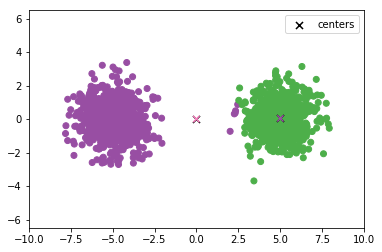

In [138]:
y_labels = []

for i in range(len(b1)):
     y_labels.append( np.argmin( [np.linalg.norm(b1[i] - center) for center in centers ]) )
plt.scatter(b1[:,0],b1[:,1], color = colors[y_labels] )
plt.scatter(*centers.T, color = colors, marker='x', s = 40, zorder = 10)
plt.scatter(*centers.T, color = 'black', marker='x', zorder = 5, s = 50, label = "centers")
plt.axis('equal')
plt.xlim(-10,10)
plt.ylim(-5,5)
plt.legend()

centers = np.zeros((2,2))
cnts = [0]*len(centers)
for i in range( len(y_labels) ):
    for k in range(max(y_labels)+1):
        if( y_labels[i] ==  k):
            centers[k] += b1[i]
            cnts[k] += 1
for k in range(max(y_labels)+1):
    centers[k] /= cnts[k]
centers, cnts

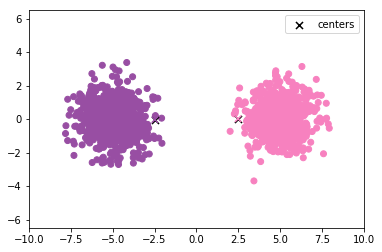

In [139]:
y_labels = []

for i in range(len(b1)):
     y_labels.append( np.argmin( [np.linalg.norm(b1[i] - center) for center in centers ]) )
plt.scatter(b1[:,0],b1[:,1], color = colors[y_labels] )
plt.scatter(*centers.T, color = colors, marker='x', s = 40, zorder = 10)
plt.scatter(*centers.T, color = 'black', marker='x', zorder = 5, s = 50, label = "centers")
plt.axis('equal')
plt.xlim(-10,10)
plt.ylim(-5,5)
plt.legend()

centers = np.zeros((2,2))
cnts = [0]*len(centers)
for i in range( len(y_labels) ):
    for k in range(max(y_labels)+1):
        if( y_labels[i] ==  k):
            centers[k] += b1[i]
            cnts[k] += 1
for k in range(max(y_labels)+1):
    centers[k] /= cnts[k]
centers, cnts

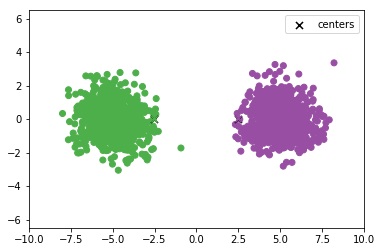

In [115]:
y_labels = []

for i in range(len(b1)):
     y_labels.append( np.argmin( [np.linalg.norm(b1[i] - center) for center in centers ]) )
plt.scatter(b1[:,0],b1[:,1], color = colors[y_labels] )
plt.scatter(*centers.T, color = colors, marker='x', s = 40, zorder = 10)
plt.scatter(*centers.T, color = 'black', marker='x', zorder = 5, s = 50, label = "centers")
plt.axis('equal')
plt.xlim(-10,10)
plt.ylim(-5,5)
plt.legend()

centers = np.zeros((2,2))
cnts = [0]*len(centers)
for i in range( len(y_labels) ):
    for k in range(max(y_labels)+1):
        if( y_labels[i] ==  k):
            centers[k] += b1[i]
            cnts[k] += 1
for k in range(max(y_labels)+1):
    centers[k] /= cnts[k]
centers, cnts    

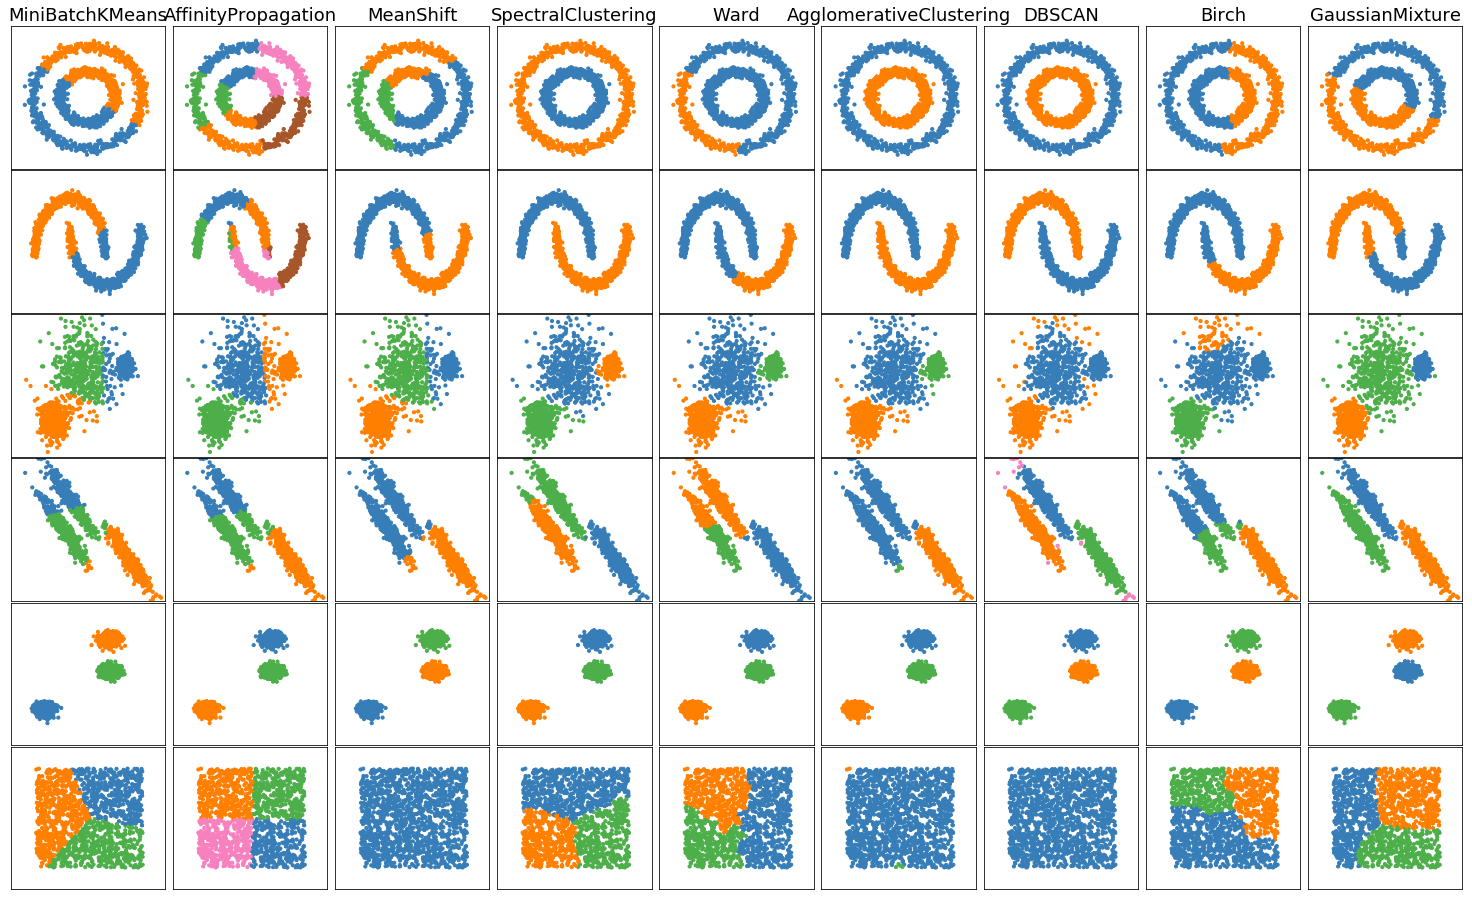

In [8]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatchKMeans', two_means),
        ('AffinityPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(np.int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        #plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
        #         transform=plt.gca().transAxes, size=15,
        #         horizontalalignment='right')
        plot_num += 1

plt.show()